<a href="https://colab.research.google.com/github/NayeGarciaP/Mi-primer-repositorio-/blob/main/Redes%20Neuronales%20Recurrentes%20(RNN)/Predicci%C3%B3n_del_precio_de_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descargamos el csv y lo leemos con pandas**

In [4]:
import pandas as pd #importamos Pandas para manipular el dataframes

_df = pd.read_csv("/content/Bitcoin_8_9_2025-9_11_2025_historical_data_coinmarketcap.csv", delimiter=';')
# Ordenamos correctamente
_df = _df.sort_index(ascending=False) #reordena las filas según el índice
                                      #(no por fecha) en orden descendente.
_df.head() #muestra las primeras 5 filas

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,circulatingSupply,timestamp
397,2024-10-07T00:00:00.000Z,2024-10-07T23:59:59.999Z,2024-10-07T14:25:00.000Z,2024-10-07T23:01:00.000Z,2781,62819.109333,64443.706412,62152.551708,62236.659368,3.425356e+10,1.229782e+12,19764540,2024-10-07T23:59:59.999Z
396,2024-10-08T00:00:00.000Z,2024-10-08T23:59:59.999Z,2024-10-08T14:03:00.000Z,2024-10-08T19:16:00.000Z,2781,62221.645149,63174.306200,61843.563661,62131.967854,2.813448e+10,1.228038e+12,19765071,2024-10-08T23:59:59.999Z
395,2024-10-09T00:00:00.000Z,2024-10-09T23:59:59.999Z,2024-10-09T05:58:00.000Z,2024-10-09T20:56:00.000Z,2781,62131.726103,62508.835737,60314.614386,60582.100970,2.767098e+10,1.197430e+12,19765459,2024-10-09T23:59:59.999Z
394,2024-10-10T00:00:00.000Z,2024-10-10T23:59:59.999Z,2024-10-10T12:03:00.000Z,2024-10-10T18:27:00.000Z,2781,60581.929687,61236.723171,58895.207808,60274.498064,3.045281e+10,1.191401e+12,19765931,2024-10-10T23:59:59.999Z
393,2024-10-11T00:00:00.000Z,2024-10-11T23:59:59.999Z,2024-10-11T19:13:00.000Z,2024-10-11T01:37:00.000Z,2781,60275.460835,63400.869880,60046.125828,62445.088607,3.032714e+10,1.234303e+12,19766371,2024-10-11T23:59:59.999Z


Se ontiene como resultado el Dataframe con las siguientes columnas: 'timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name', 'open', 'high',
'low', 'close', 'volume', 'marketCap', 'circulatingSupply','timestamp'

# Seleccionamos el Dataframe

In [5]:
df = _df[['timeOpen', 'open', 'high', 'low', 'close']]
#Crea el Dataframe con solo esas 5 columnas y lo guarda en un nuevo DataFrame llamado df.

# Convertir los datos a un numpy array

In [6]:
dates = df[['close']].values
#Extrae los valores de la columna 'close' del DataFrame df
#y los convierte en un NumPy array bidimensional.


# **Escalar los valores**

In [7]:
#Utiliza la clase MinMaxScaler para escalar los valores entre 0 y 1
from sklearn.preprocessing import MinMaxScaler
#Importa la clase MinMaxScaler de scikit-learn, que es usada
#para normalizar datos.
scaler = MinMaxScaler(feature_range=(0, 1))
#Crea una instancia del MinMaxScaler para escalar los datos entre 0 y 1.
scaled_data = scaler.fit_transform(dates)
#Ajusta el escalador a los datos de cierre (dates) y luego los transforma,
#guardando los valores escalados en scaled_data.

# **Secuencias**

Aquí  se crean las secuencias de datos a partir de un conjunto y un tamaño de ventana dado.

Definir el tamaño de la ventana de tiempo

In [8]:
window_size = 60
#Define el tamaño de la ventana de tiempo como 60,
#lo que significa que el modelo usará 60 días (o puntos de datos)
#anteriores para predecir el siguiente día.

Aquí se establece el tamaño de la ventana de tiempo, que es el número de puntos de datos que se utilizarán para predecir el siguiente punto de datos en una secuencia.

# **Crear las secuencias de datos**

In [10]:
import numpy as np #Importa la librería numpy para operaciones matematicas

def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])
        # El precio es la primera columna
        labels.append(data[i + window_size, 0])
    return np.array(sequences), np.array(labels)

X, y = create_sequences(scaled_data, window_size)

def create_sequences(data, window_size): Define una función que toma los datos escalados y el tamaño de la ventana, y crea pares de secuencias ($X$) y etiquetas ($y$).

sequences.append(data[i:i+window_size]): Dentro del bucle, agrega una ventana de datos (los 60 días anteriores) a la lista de secuencias ($X$).

labels.append(data[i + window_size, 0]): Agrega el valor siguiente al final de la ventana (el día a predecir) como la etiqueta ($y$).

X, y = create_sequences(scaled_data, window_size): Llama a la función para generar los conjuntos de datos de entrada ($X$) y salida ($y$).

En cada iteración, se crea una secuencia de datos de longitud window_size utilizando el índice i como punto de partida y se agrega a la lista sequences. Además, se agrega la etiqueta correspondiente al siguiente punto de datos después de la secuencia a la lista labels.

# **Conjunto de entrenamiento y prueba**

In [11]:
#Dividimos los datos en conjuntos de entrenamiento y prueba
split = int(len(X) * 0.8)
#Calcula el índice para dividir los datos, usando el 80% para entrenamiento.
X_train, y_train = X[:split], y[:split]
#Asigna el 80% inicial de los datos para el entrenamiento.
X_test, y_test = X[split:], y[split:]
#Asigna el 20% restante para las pruebas.

# **Modelo RNN**

In [12]:
from tensorflow.keras.models import Sequential
#Importa la clase Sequential para construir el modelo capa por capa.
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN #Importa las capas a usar

model = Sequential() #Inicializa un nuevo modelo secuencial.
model.add(SimpleRNN(units=120, return_sequences=True, input_shape=(window_size, X_train.shape[2])))
#Añade la primera capa SimpleRNN con 120 unidades, especificando la forma de entrada (input_shape)
#y retornando secuencias (return_sequences=True).
model.add(SimpleRNN(units=60, return_sequences=False))
#Añade una segunda capa SimpleRNN con 60 unidades, que no retorna secuencias (return_sequences=False),
#lo que compacta la salida para las capas Dense.
model.add(Dense(units=30))
#Añade una capa Densa (completamente conectada) con 30 neuronas.
model.add(Dense(units=1))
#Añade la capa de salida Densa con 1 neurona (la predicción del precio).

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Este modelo está diseñado para procesar secuencias de datos con una red neuronal recurrente simple y luego realizar una predicción utilizando capas completamente conectadas.

# **Entrenamiento y compilación**

In [13]:
from tensorflow.keras.optimizers import Adam
#Importa el optimizador Adam.

learning_rate = 0.001 #Define la tasa de aprendizaje.
adam_optimizer = Adam(learning_rate=learning_rate)
#Inicializa el optimizador Adam.

# Compilar el modelo usando el optimizador Adam y la pérdida de error
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Entrenar el modelo con los datos de entrenamiento
#usando untamaño de 1 y 10 epocas
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.0220
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0040
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0080
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0034
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0030
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0034
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0019
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0025
Epoch 9/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0019
Epoch 10/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0022


# **Testing**

In [16]:
# Hacer predicciones
predictions = model.predict(X_test)
#Genera predicciones para el conjunto de prueba

# Desescalar los datos predichos que estaban en 0 y 1 a la escala
#original, para que sean valores utilizables, se agrega
#np.zeros para que el inverse funcione con el numero original
#y_test: desescala los valores reales de prueba a la escala original para
#que se puedan comparar con otras predicciones
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 3))), axis=1))[:,0]
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 3))), axis=1))[:,0]


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


# **Calculo de metricas**

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predictions)
#Calcula el Error Absoluto Medio
rmse = np.sqrt(mean_squared_error(y_test, predictions))
# y calcula la raiz del error

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
#imprime las metricas de error

MAE: 468463923897590.44
RMSE: 468952285157179.8


# **Graficar los resultados**

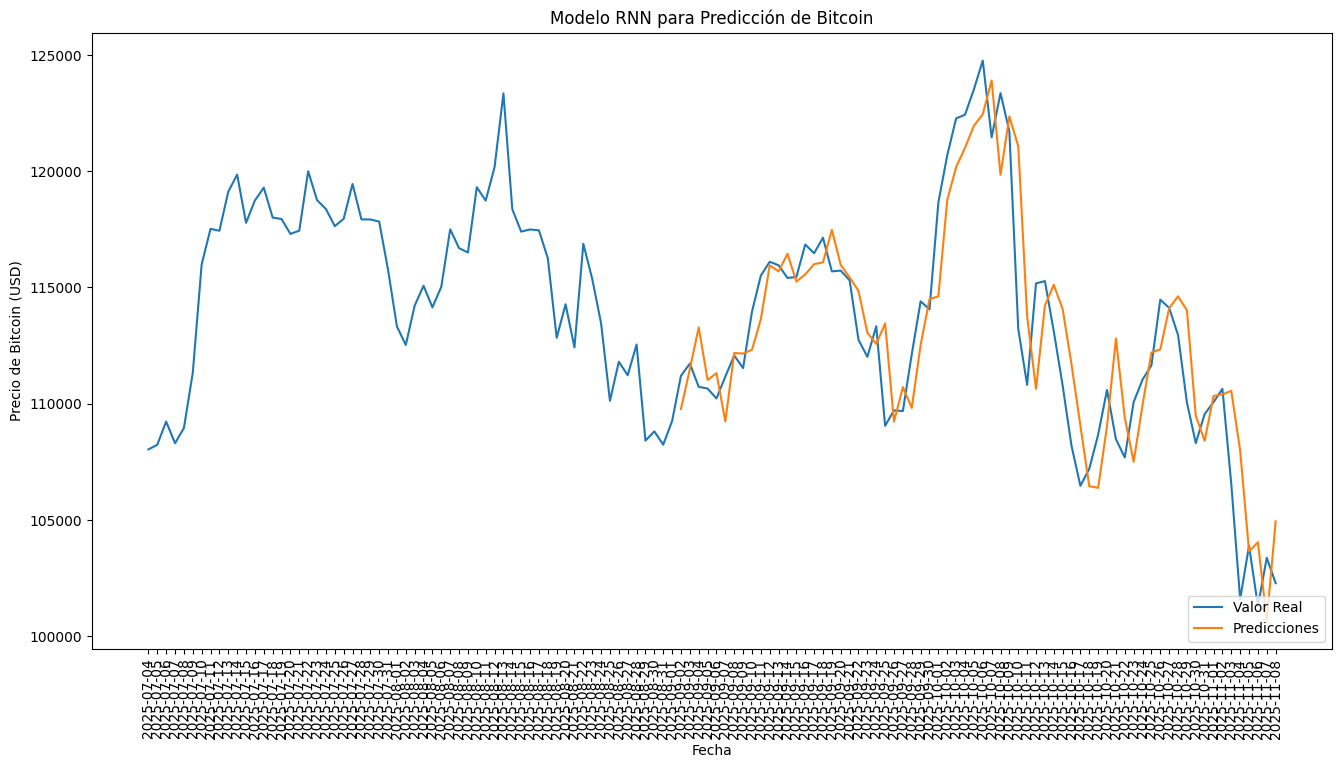

In [19]:
import matplotlib.pyplot as plt
import numpy as np

valid = df[split:]
# Reiniciar el índice del DataFrame de validación
valid = valid.reset_index(drop=True)
# Inicializar la columna de predicciones con NaN
valid['Predictions'] = np.nan

# Añadir las predicciones al DataFrame de validación desde el punto donde inician las predicciones
valid.loc[window_size:, 'Predictions'] = predictions
dates_valid = pd.to_datetime(valid['timeOpen']).apply(lambda x: x.strftime('%Y-%m-%d')).tolist()

plt.figure(figsize=(16,8))
plt.title('Modelo RNN para Predicción de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio de Bitcoin (USD)')
plt.plot(dates_valid, valid[['close', 'Predictions']])
plt.legend(['Valor Real', 'Predicciones'], loc='lower right')
plt.xticks(rotation=90)
plt.show()

# **Predicción de valores nuevos**

En este caso haremos la predicción del valor de cierre de Bitcoin en los proximos 115 días

In [20]:
# Generar secuencias para los siguientes días
future_sequences = []
# Última secuencia de los valores que tenemos
last_sequence = X[-1]
#Obtiene la última secuencia de datos conocida, que servirá como punto
#de partida para las predicciones futuras.
days = 10 #Define el número de días futuros a predecir.
for _ in range(days):
  #Bucle para generar predicciones secuenciales día a día.
    # Predecir el siguiente valor
    next_value = model.predict(np.array([last_sequence]))[0, 0]
#Predice el siguiente valor utilizando la última secuencia disponible.
    # Actualizar la secuencia para la siguiente predicción
    last_sequence = np.concatenate((last_sequence[1:], [[next_value]]), axis=0)

    # Añadir la nueva secuencia a las secuencias futuras
    future_sequences.append(last_sequence)

# Convertir las secuencias futuras a un numpy y reshape para la RNN
future_sequences = np.array(future_sequences)
future_sequences = np.reshape(future_sequences, (future_sequences.shape[0], future_sequences.shape[1], 1))

# Hacer predicciones para los siguientes días
future_predictions = model.predict(future_sequences)

# Desescalar los datos predichos para los siguientes días
#Desescala las predicciones futuras al precio real en USD.
#Genera las fechas futuras correspondientes a las predicciones.
future_predictions = scaler.inverse_transform(np.concatenate((future_predictions, np.zeros((future_predictions.shape[0], 3))), axis=1))[:,0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


# **Generar fechas para los siguientes días**

In [21]:
# Última fecha en los datos reales
last_date = df['timeOpen'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=days)[1:]
future_dates = future_dates.strftime('%Y-%m-%d').tolist()

# **Graficamos los resultados de los siguientes 30 días**

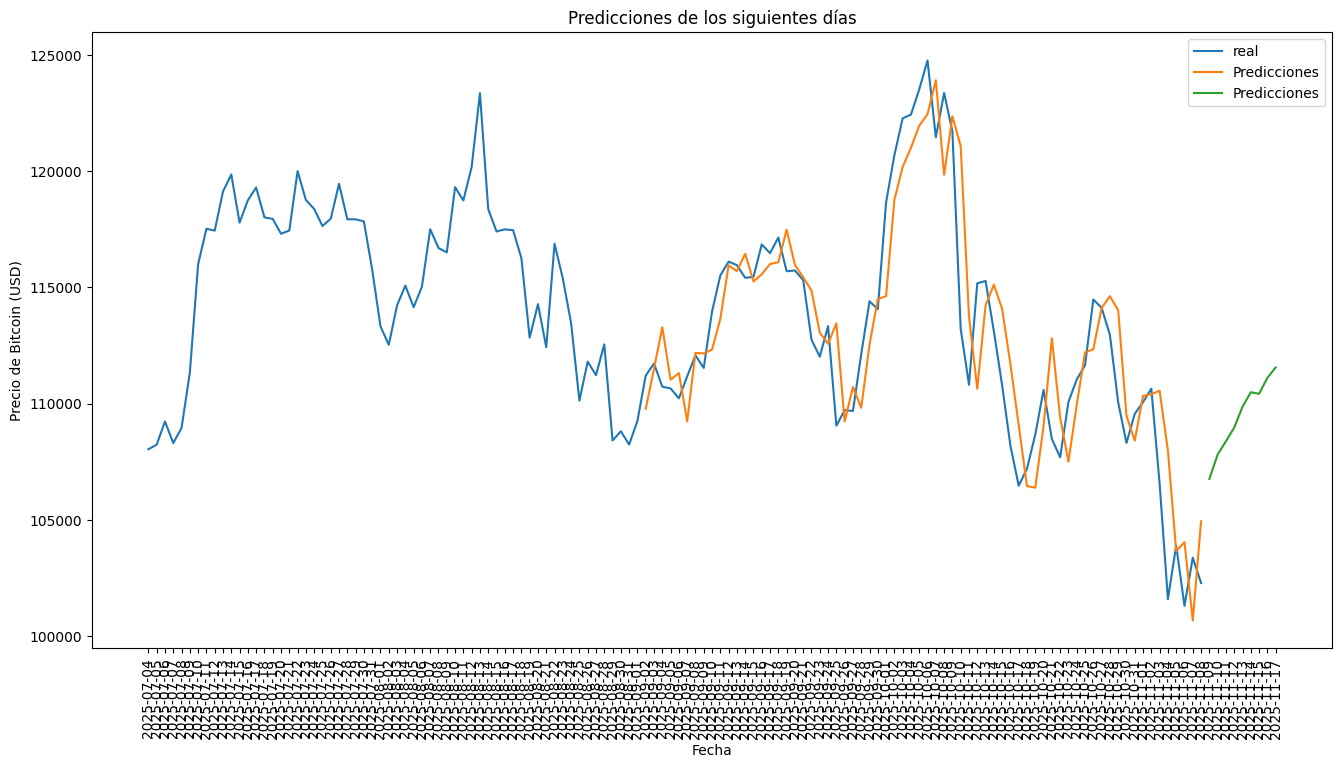

In [22]:
plt.figure(figsize=(16,8))
plt.title('Predicciones de los siguientes días')
plt.xlabel('Fecha')
plt.ylabel('Precio de Bitcoin (USD)')
plt.plot(dates_valid, valid[['close', 'Predictions']], label=['real', 'Predicciones'])
plt.plot(future_dates, future_predictions[:-1], label='Predicciones')
plt.legend()
plt.xticks(rotation=90)
plt.show()

El código demuestra una implementación de una RNN Simple de dos capas, entrenada sobre ventanas de 60 días de los precios de cierre de Bitcoin, con el objetivo de predecir el precio al siguiente día.

Evalúa en un conjunto de prueba, grafica resultados reales contra las predicciones y genera predicciones autoregresivas para días futuros.

Es un modelo secuencial que es más rápido de entrenar y puede ser una buena idea para capturar patrones a corto plazo gracias a la velocidad de entrenamiento y su capacidad predictiva.

